Group Project: Brain Tumor detection
Anish Khanal: C0898110 
Syed Roman Udin: C0906298
Ujjwal Khatri: C0899849
Prashant Bhattrai: C0898956 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Dell/Desktop/DSML'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Dell/Desktop/DSML\brain.ipynb
C:/Users/Dell/Desktop/DSML\brain.zip
C:/Users/Dell/Desktop/DSML\output.png
C:/Users/Dell/Desktop/DSML\output1.png
C:/Users/Dell/Desktop/DSML\output2.png
C:/Users/Dell/Desktop/DSML\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(1).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(10).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(100).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(11).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(12).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(13).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(14).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(15).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(16).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(17).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(18).jpg
C:/Users/Dell/Desktop/DSML\Testing\glioma_tumor\image(

In [5]:
# Import necessary libraries
# Import necessary libraries
import keras  # Import the Keras library for building neural networks
from keras.models import Sequential  # Import the Sequential class for creating a sequential model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout  # Import different types of layers for the model architecture
from sklearn.metrics import accuracy_score  # Import accuracy_score from scikit-learn for evaluating model performance

In [6]:
# Import necessary libraries
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [7]:
# Initialize lists to store training data and corresponding labels
X_train = []  # List to store image data
Y_train = []  # List to store labels
# Define image size for resizing
image_size = 150
# Define the labels for different tumor types
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../DSML/Training/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../DSML/Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# Convert the lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
# Import the shuffle function from scikit-learn
# Shuffle the training data and corresponding labels while maintaining the same random state for reproducibility
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
# Get the shape of the shuffled training data
X_train.shape

(3264, 150, 150, 3)

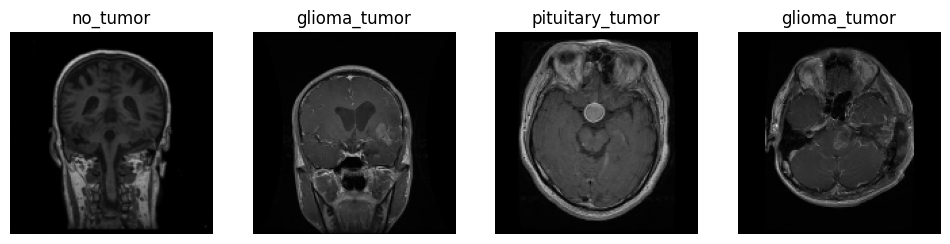

In [9]:
import matplotlib.pyplot as plt
# Sample Visualization
# Define the number of samples you want to visualize
num_samples = 4
# Generate random indices without replacement from the range of available training data
random_indices = np.random.choice(len(X_train), num_samples, replace=False)
plt.figure(figsize=(12, 8))
# Loop through each randomly selected index
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_train[idx])
    plt.title(Y_train[idx])
    plt.axis('off')
plt.show()

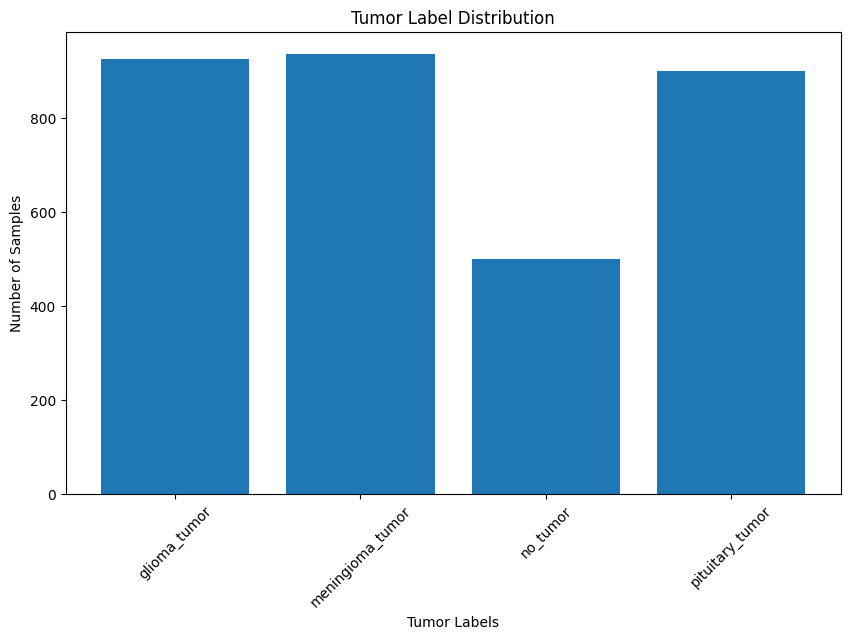

In [9]:
import matplotlib.pyplot as plt
# Count the occurrences of each label in the training data
label_counts = {label: 0 for label in labels}

for label in Y_train:
    label_counts[label] += 1

# Create a bar plot to visualize the label distribution
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Tumor Labels')
plt.ylabel('Number of Samples')
plt.title('Tumor Label Distribution')
plt.xticks(rotation=45)
plt.show()

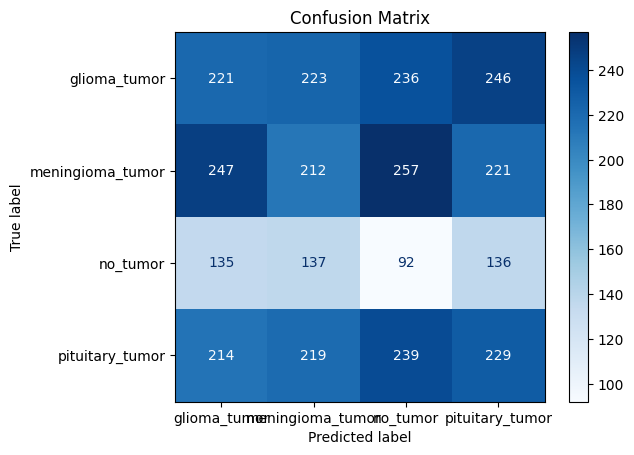

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Define the labels and their corresponding indices
label_to_index = {label: index for index, label in enumerate(labels)}

# Convert class labels to numerical indices
Y_train_indices = np.array([label_to_index[label] for label in Y_train])

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(labels)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, values_format=".4g")
    plt.title(title)
    plt.show()

# Example usage
# Replace this with your actual prediction code
# For example, if you have a model 'model' that predicts Y_pred:
# Y_pred = model.predict(X_train)
Y_pred_indices = np.random.randint(len(labels), size=len(Y_train))

plot_confusion_matrix(Y_train_indices, Y_pred_indices, labels)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Create a Sequential model
model = Sequential()
# Add a Conv2D layer with 32 filters, each of size (3, 3), and ReLU activation
# Input shape is (150, 150, 3) for images with width, height, and 3 color channels
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
# Add another Conv2D layer with 64 filters and ReLU activation
model.add(Conv2D(64,(3,3),activation='relu'))
# Add a MaxPooling2D layer with pool size (2, 2)
model.add(MaxPooling2D(2,2))
# Add a Dropout layer with dropout rate of 0.3 to prevent overfitting
model.add(Dropout(0.3))
# Add a Dropout layer with dropout rate of 0.3 to prevent overfitting
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Conv2D(64,(3,3),activation='relu'))
# Add a Dropout layer with dropout rate of 0.3 to prevent overfitting
model.add(Dropout(0.3))
# Add a MaxPooling2D layer with pool size (2, 2)
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
# Add the output layer with 4 units (one for each class) and softmax activation
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 204s 2s/step - loss: 2.1620 - accuracy: 0.2857 - val_loss: 1.3625 - val_accuracy: 0.3367
Epoch 2/20
83/83 [==============================] - 195s 2s/step - loss: 1.1839 - accuracy: 0.4741 - val_loss: 0.9824 - val_accuracy: 0.5306
Epoch 3/20
83/83 [==============================] - 198s 2s/step - loss: 0.9724 - accuracy: 0.5770 - val_loss: 0.8711 - val_accuracy: 0.5952
Epoch 4/20
83/83 [==============================] - 202s 2s/step - loss: 0.8603 - accuracy: 0.6239 - val_loss: 0.8789 - val_accuracy: 0.6429
Epoch 5/20
83/83 [==============================] - 197s 2s/step - loss: 0.7694 - accuracy: 0.6663 - val_loss: 0.8294 - val_accuracy: 0.6701
Epoch 6/20
83/83 [==============================] - 204s 2s/step - loss: 0.6605 - accuracy: 0.7283 - val_loss: 0.6734 - val_accuracy: 0.7211
Epoch 7/20
83/83 [==============================] - 218s 3s/step - loss: 0.6064 - accuracy: 0.7491 - val_loss: 0.6541 - val_accuracy: 0.7109
Epoch 8/20
83

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

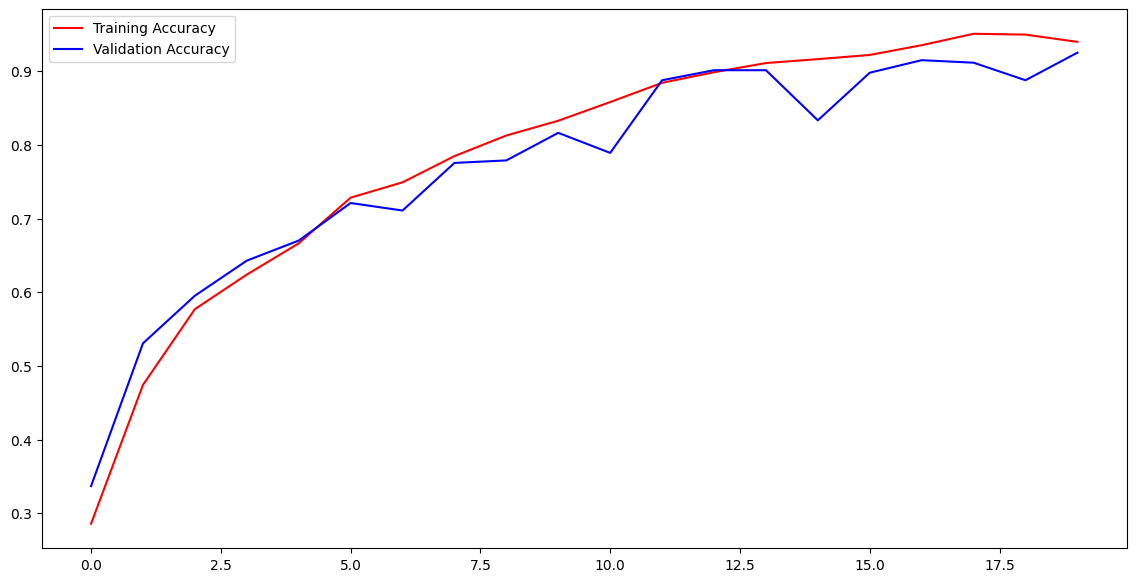

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

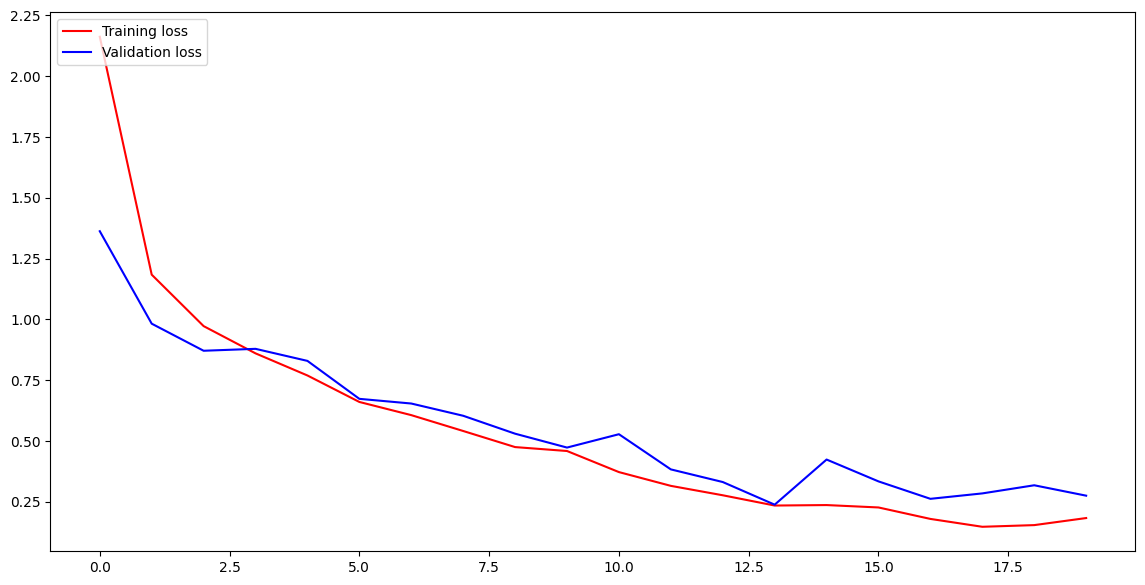

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [25]:
img = cv2.imread('../DSML/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [26]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

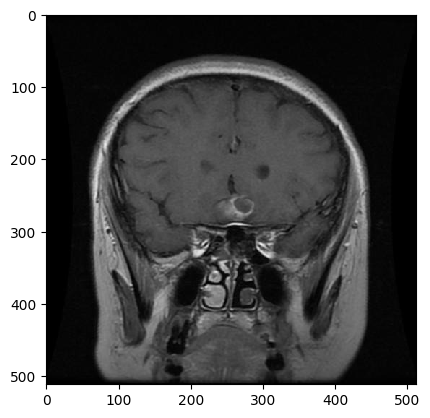

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../DSML/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [28]:
a=model.predict(img_array)
indices = a.argmax()
indices
predicetedindex=labels[indices]
predicetedindex

1/1 [==============================] - 1s 556ms/step


'pituitary_tumor'

Conclusion

This code defines a convolutional neural network (CNN) model using the Keras library. The model consists of multiple Conv2D layers for feature extraction, MaxPooling2D layers for down-sampling, Dropout layers for regularization, and fully connected (Dense) layers for classification. The final output layer has softmax activation for multi-class classification with 4 classes (glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor).
The neural network model has been trained for 20 epochs. The training accuracy has improved over the epochs, reaching around 93.98%, and the validation accuracy has also improved, reaching about 92.52%. This indicates that the model is learning from the data and is able to generalize well to unseen validation data.
However, it's important to note that while the accuracy values are increasing, further analysis and evaluation are necessary to determine if the model is indeed performing well. Other factors such as overfitting, convergence, and potential class imbalances should be considered.
In future we will try to implement it in clinical setting for real-world validation.
